<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/used_car_price_nested_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/used_car_price.csv')

In [3]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [4]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


In [6]:
df.describe(include='object')

,Make,Model,Type,Origin,DriveTrain
count,428,428,428,428,428
unique,38,425,6,3,3
top,Toyota,G35 4dr,Sedan,Asia,Front
freq,28,2,262,158,226


In [7]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [8]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

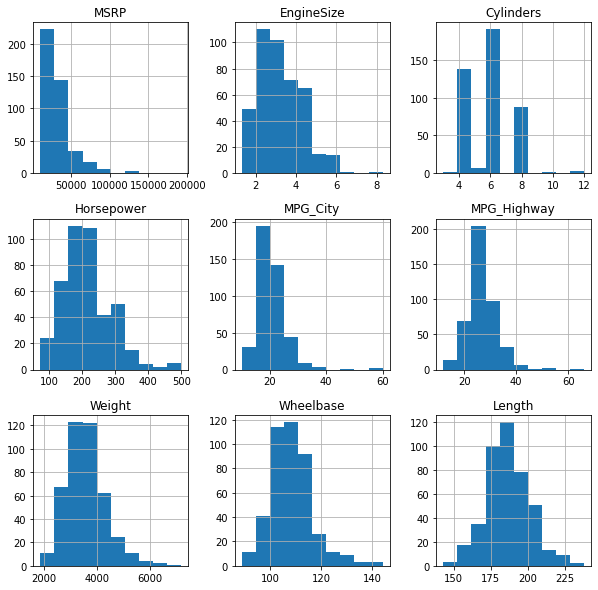

In [9]:
df.hist(figsize=(10,10));

<Figure size 1440x1440 with 0 Axes>

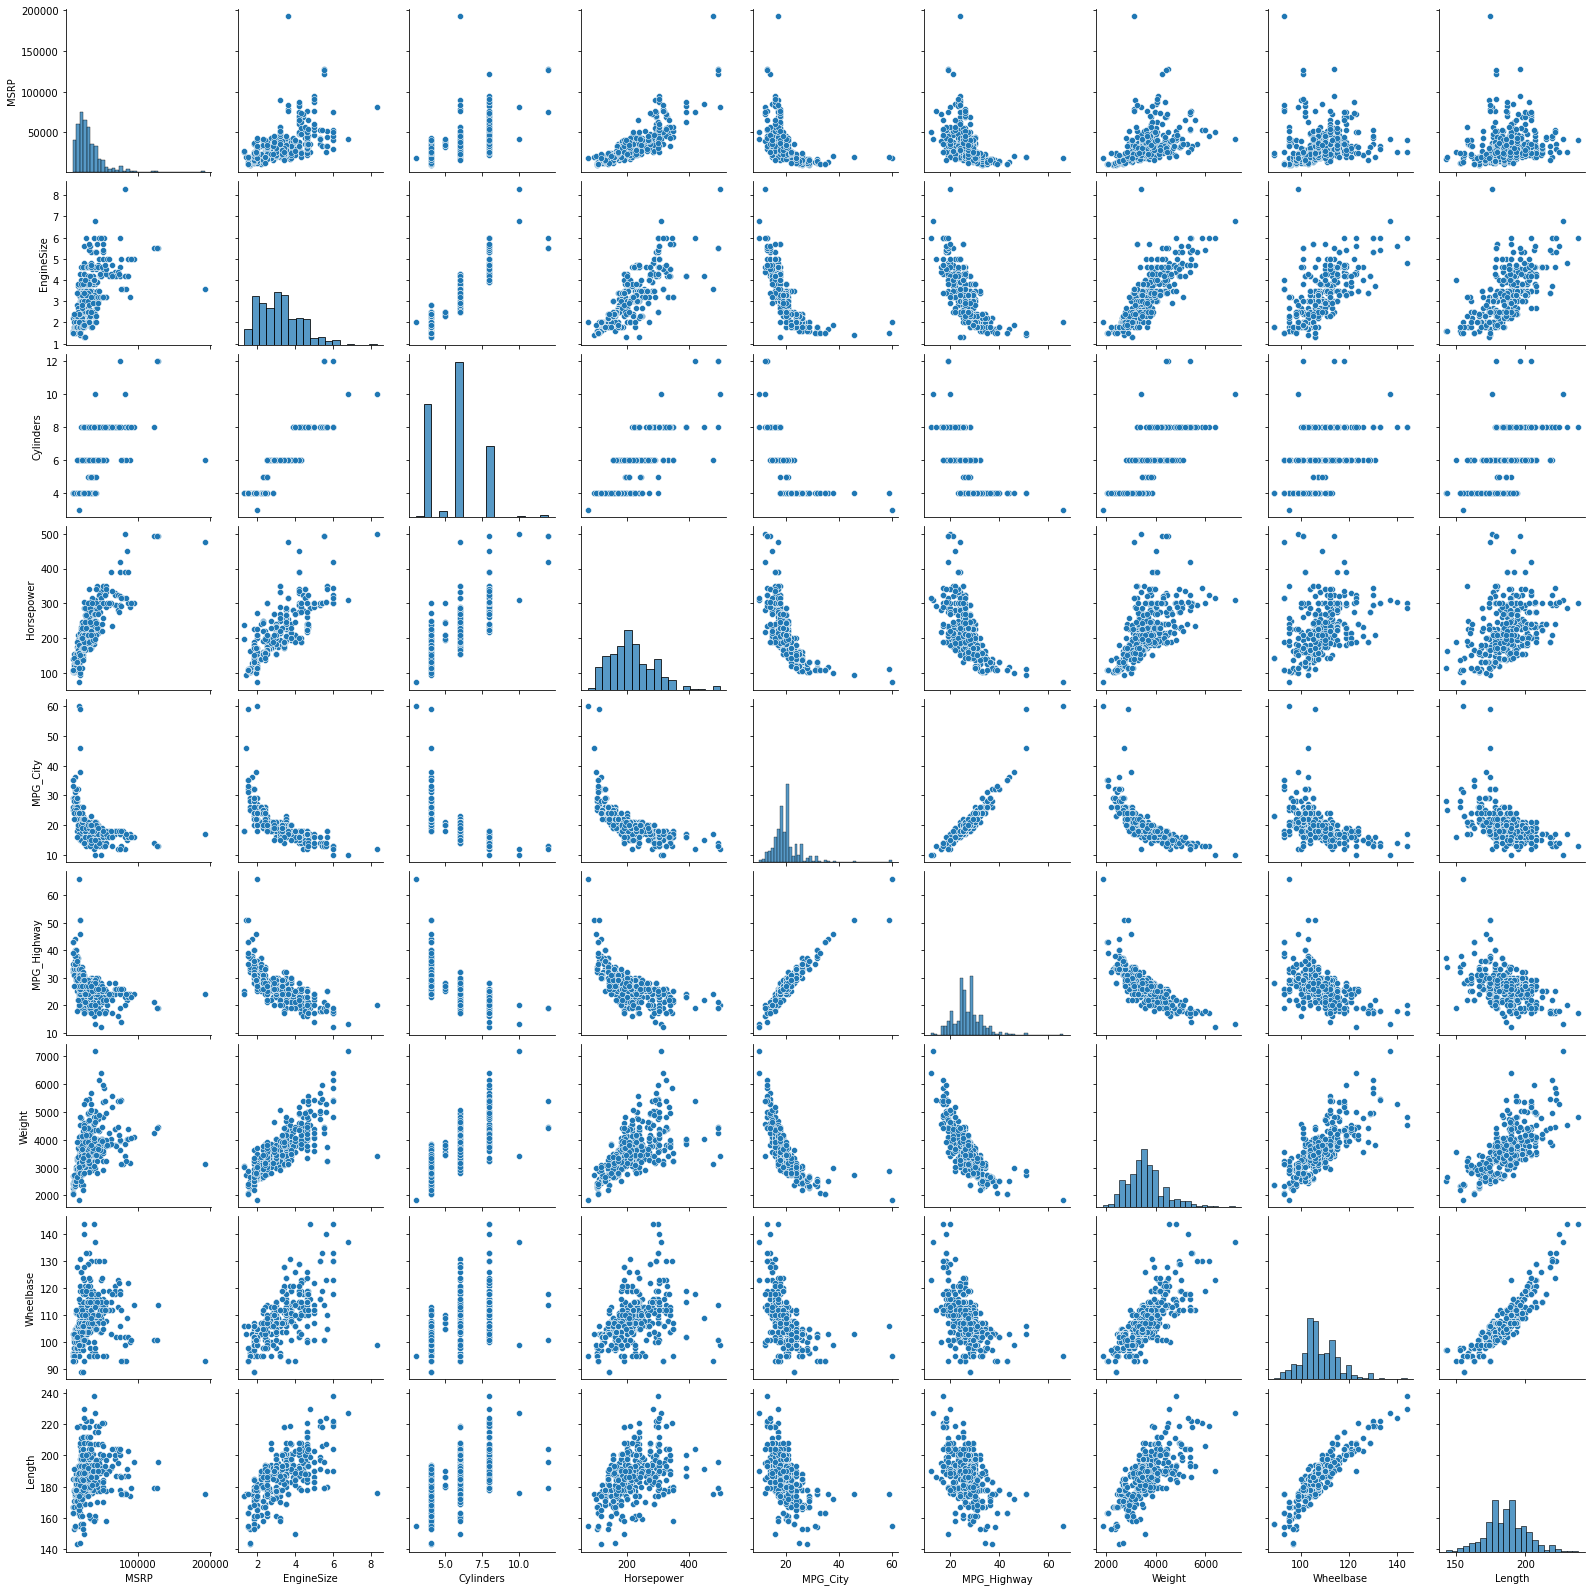

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


In [9]:
cat_df = df.select_dtypes (include='object')

In [10]:
cat_df = cat_df.astype('category')

In [11]:
cat_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], dtype='object')

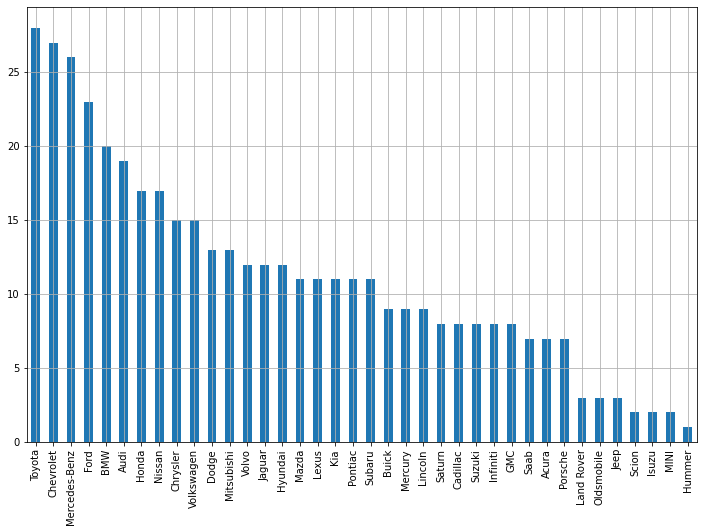

In [12]:
cat_df['Make'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(12,8), grid=True);

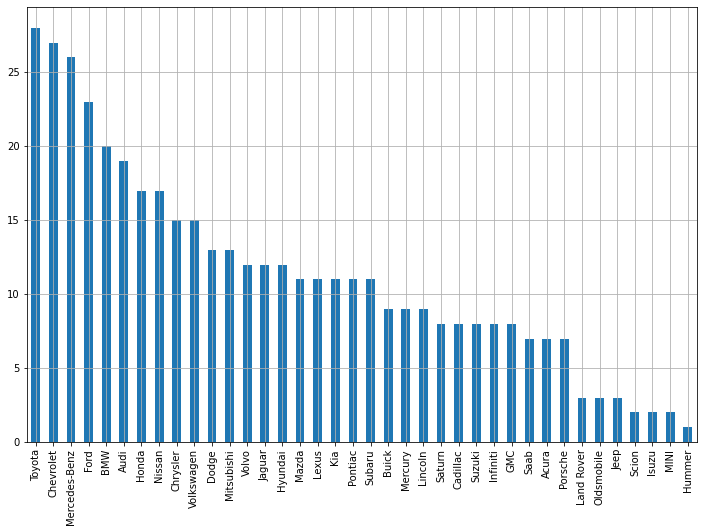

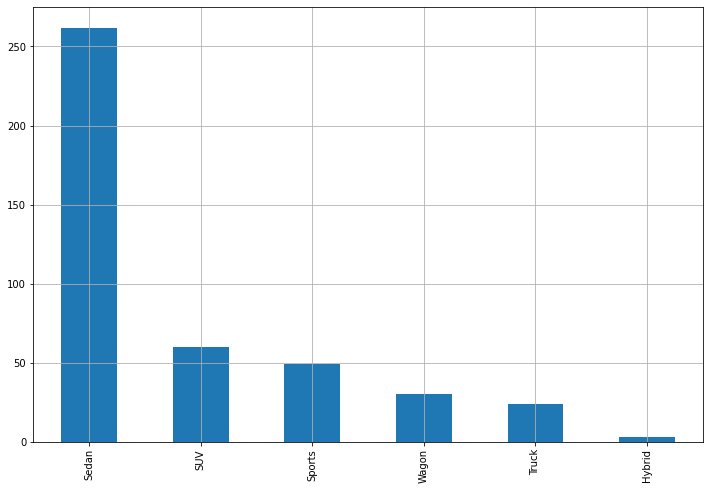

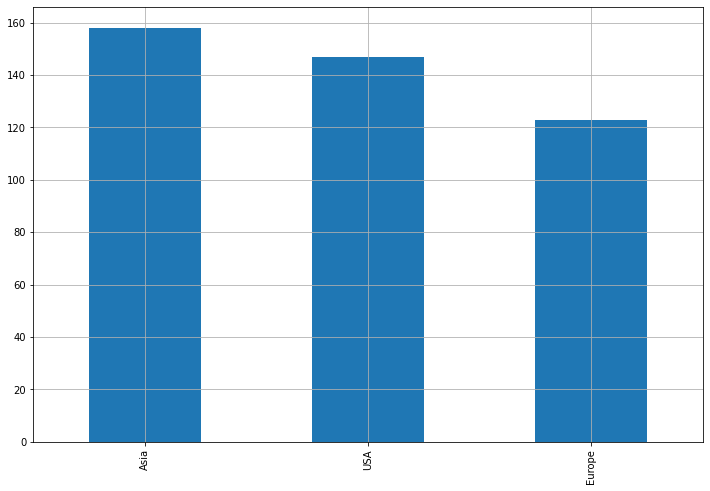

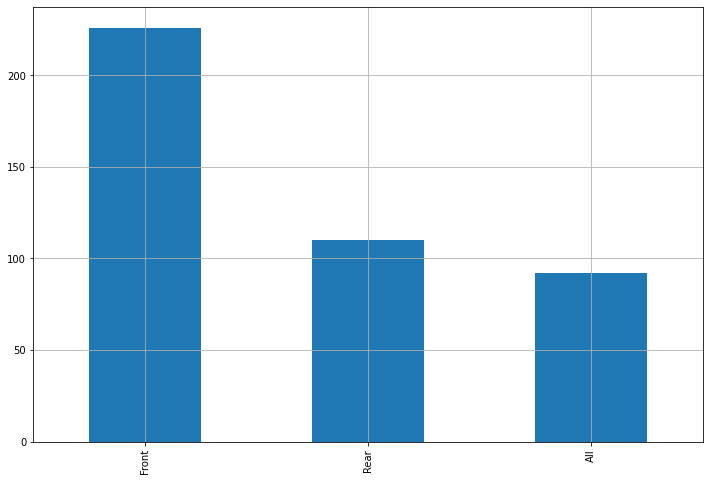

In [70]:
for i in cat_df.columns:
  if i != 'Model':
    cat_df[i].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(12,8), grid=True)
    plt.show()

In [81]:
cat_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], dtype='object')

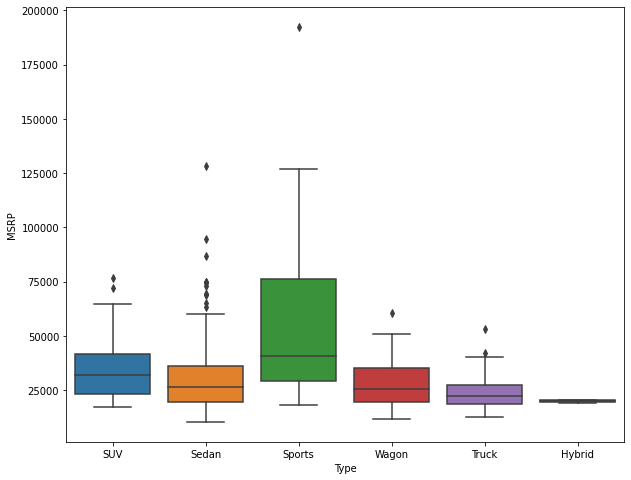

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type', y='MSRP', data=df);

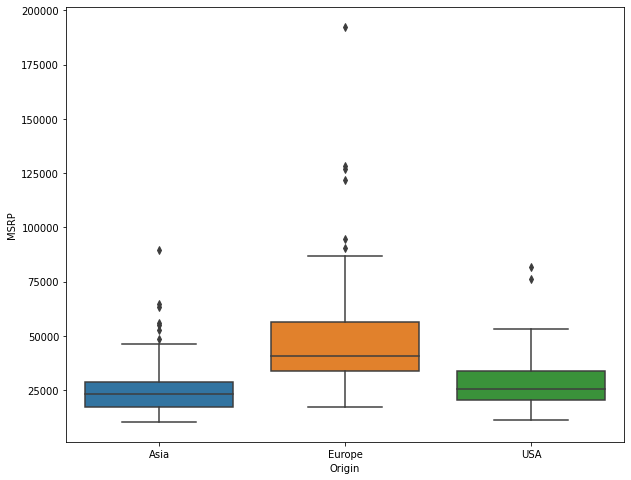

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Origin', y='MSRP', data=df);

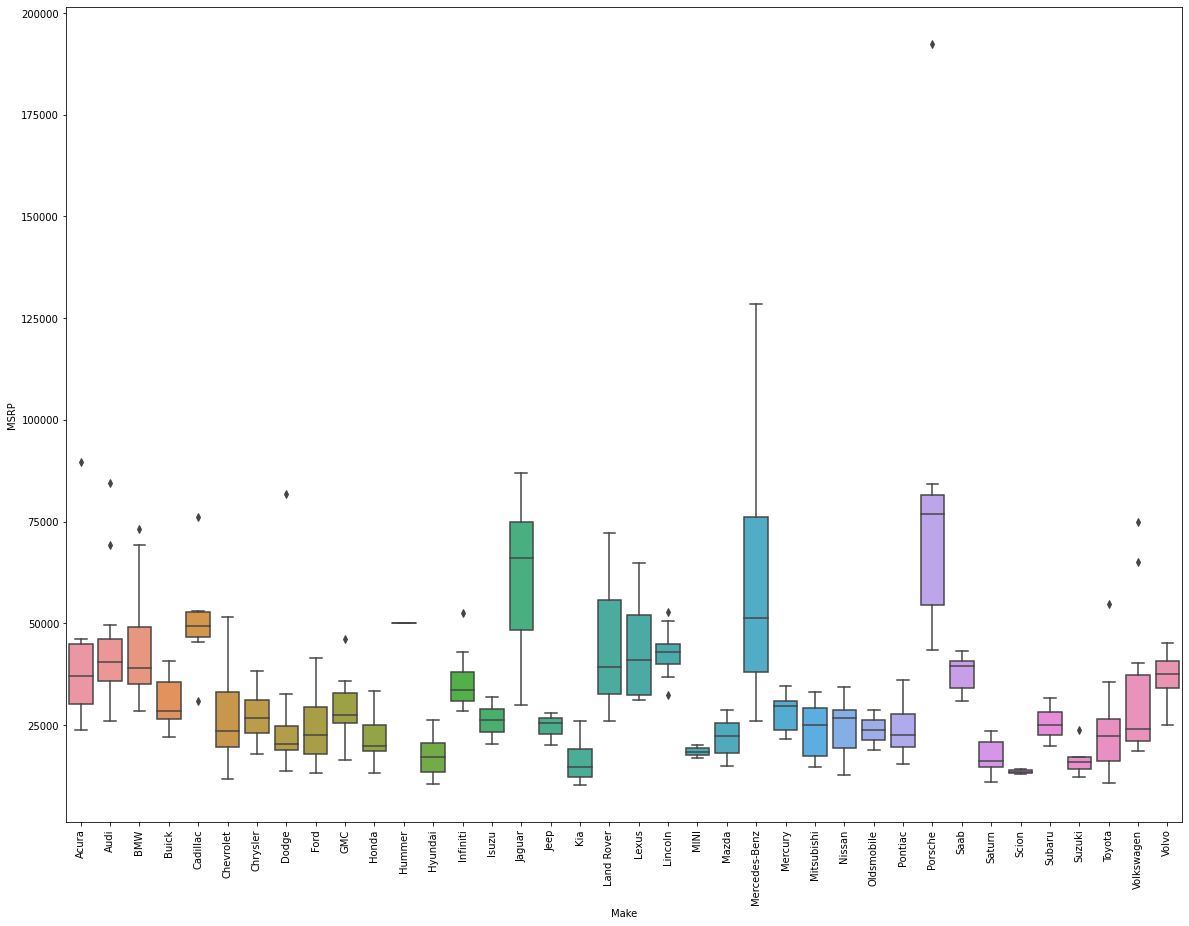

In [97]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Make', y='MSRP',  data=df)
plt.xticks(rotation=90);

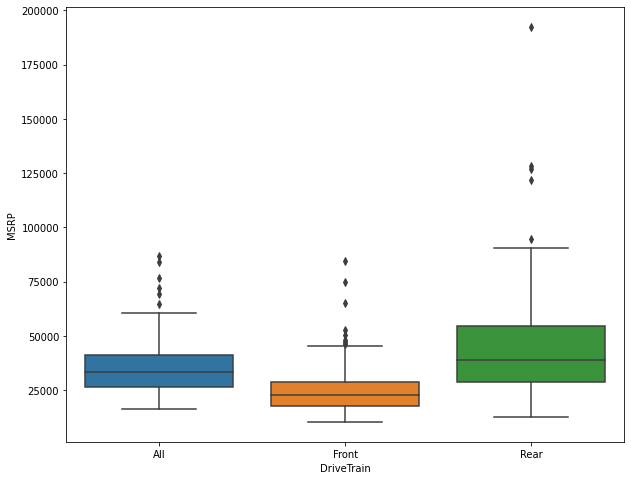

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(x='DriveTrain', y='MSRP', data=df);

In [13]:
numeric_df = df.select_dtypes(exclude='object')

In [14]:
numeric_df

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,36945,3.5,6,265,17,23,4451,106,189
1,23820,2.0,4,200,24,31,2778,101,172
2,26990,2.4,4,200,22,29,3230,105,183
3,33195,3.2,6,270,20,28,3575,108,186
4,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5,197,21,28,3450,105,186
424,42565,2.3,5,242,20,26,3450,105,186
425,45210,2.9,6,268,19,26,3653,110,190
426,26135,1.9,4,170,22,29,2822,101,180


In [15]:
cat_df.shape

(428, 5)

In [16]:
numeric_df.shape

(428, 9)

In [17]:
df.shape

(428, 14)

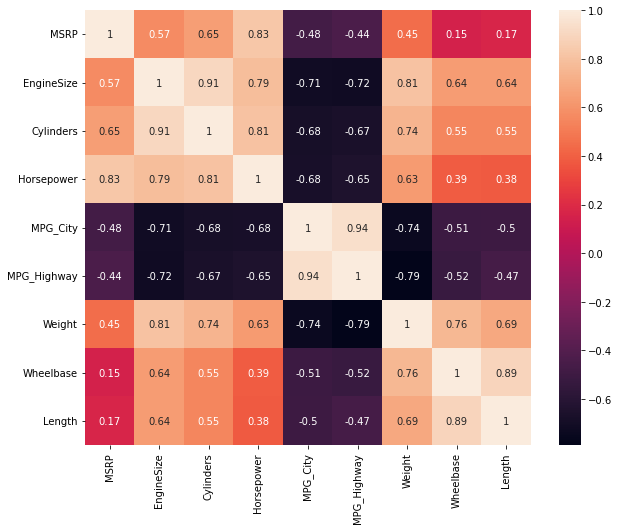

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True)

In [19]:
cat_df = cat_df.drop('Model', axis =1)

In [20]:
cat_code_df = pd.get_dummies(cat_df, drop_first=True)

In [21]:
numeric_df

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,36945,3.5,6,265,17,23,4451,106,189
1,23820,2.0,4,200,24,31,2778,101,172
2,26990,2.4,4,200,22,29,3230,105,183
3,33195,3.2,6,270,20,28,3575,108,186
4,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5,197,21,28,3450,105,186
424,42565,2.3,5,242,20,26,3450,105,186
425,45210,2.9,6,268,19,26,3653,110,190
426,26135,1.9,4,170,22,29,2822,101,180


In [22]:
new_df = pd.concat([numeric_df, cat_code_df], axis=1)

In [23]:
new_df.shape

(428, 55)

In [24]:
X= new_df.drop('MSRP', axis = 1)

In [25]:
y = new_df['MSRP']

In [26]:
X.shape

(428, 54)

In [27]:
y.shape

(428,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
import xgboost as xgb

In [31]:
model = xgb.XGBRegressor(objective = 'reg:squarederror')

max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs)

In [55]:
param_grid = {'max_depth':[3,5,10,15],
              'learning_rate':[0.01,0.1, 0.5],
              'n_estimators':[100,200,300,400],
              'gamma':[0,0.5,1,3],
              'colsample_bytree':[0.2, 0.3, 0.5]}

In [56]:
xgb_grid = GridSearchCV(model, param_grid=param_grid,
                        cv=5, verbose=1, scoring = 'neg_mean_absolute_error', return_train_score=True)

In [57]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'colsample_bytree': [0.2, 0.3, 0.5],
                         'gamma': [0, 0.5, 1, 3],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
xgb_grid.best_estimator_

XGBRegressor(colsample_bytree=0.2, max_depth=5, n_estimators=400,
             objective='reg:squarederror')

In [72]:
rd_grid = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, verbose=1, scoring='neg_mean_absolute_error', return_train_score=True )

In [73]:
rd_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.5],
                                        'gamma': [0, 0.5, 1, 3],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

In [74]:
rd_grid.best_score_

-4327.154492312379

In [75]:
rd_grid.best_params_

{'n_estimators': 400,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.3}

In [59]:
xgb_grid.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 400}

In [60]:
xgb_grid.best_score_

-4303.500161428363

In [61]:
nested_scores = cross_val_score(xgb_grid, X_train, y_train,scoring = 'neg_mean_absolute_error', cv=3)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


In [81]:
nested_scores.mean()

-4967.184473227339

In [79]:
rd_nested_scores = cross_val_score(rd_grid, X_train, y_train,scoring = 'neg_mean_absolute_error', cv=3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [80]:
rd_nested_scores.mean()

-4909.244783100329

In [63]:
xgb_grid.best_estimator_

XGBRegressor(colsample_bytree=0.2, max_depth=5, n_estimators=400,
             objective='reg:squarederror')

In [64]:
y_pred = xgb_grid.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))


28658951.355334494
5353.405584796887


In [77]:
y_pred = rd_grid.predict(X_test)

In [78]:
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

20147741.9833442
4488.62361791944
